In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [10]:
df = pd.read_csv('eda.csv')

In [11]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,rstudio_yn,spark_yn,excel_yn,aws_yn,job_simplified,seniority,desc_len,Comp_count
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,48,1,0,0,1,0,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,37,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,11,1,0,1,1,0,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,56,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,23,1,0,0,1,0,data scientist,na,2728,3


In [12]:
df.shape

(742, 33)

In [14]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'excel_yn', 'aws_yn', 'job_simplified',
       'seniority', 'desc_len', 'Comp_count'],
      dtype='object')

## Feature Engineering

In [15]:
### Choose relevant columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'excel_yn', 'aws_yn', 'job_simplified',
       'seniority', 'desc_len', 'Comp_count'],
      dtype='object')

In [20]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','Comp_count','Hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark_yn','aws_yn','excel_yn','job_simplified','seniority','desc_len']]

In [21]:
df_model.head()

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,Comp_count,Hourly,employer_provided,job_state,same_state,age,python_yn,spark_yn,aws_yn,excel_yn,job_simplified,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,48,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,37,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,11,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,56,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,23,1,0,0,1,data scientist,na,2728


In [22]:
### One hot encodin
df_dum = pd.get_dummies(df_model)

In [23]:
df_dum.shape

(742, 178)

In [24]:
X = df_dum.drop('avg_salary',axis=1)
y = df_dum.avg_salary.values

### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
X_train.shape

(593, 177)

## Model Building

In [28]:
### Multiple Linear Regression

import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           1.47e-94
Time:                        22:55:33   Log-Likelihood:                -3311.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6140      6.719      6.492      0.000      30.419      56.809
Rating                                                3.6064      1.937      1.862      0.063      -0.198       7.411
Comp_count                                            2.2505      0.868      2.592      0.010       0.546       3.955
Hourly                                              -36.5704      9.173     -3.987      0.000     -54.586     -18.555
employer_provided                                    31.3701     11.524      2.722      0.007       8.737      54.003
same_state                                            2.4847      2.619      0.949      0.343      -2.658       7.628
age                                                   0.0351      0.030      1.168      0.243      -0.024       0.094
python_yn                                             8.1371      2.523      3.225      0.001       3.181      13.093
spark_yn                                             -0.5712      2.920     -0.196      0.845      -6.307       5.164
aws_yn                                                1.1221      2.736      0.410      0.682      -4.251       6.495
excel_yn                                             -0.4039      2.268     -0.178      0.859      -4.857       4.050
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6141      8.629      1.578      0.115      -3.333      30.561
Size_1 to 50 employees                                1.1074      6.501      0.170      0.865     -11.660      13.875
Size_10000+ employees                                -2.8895      5.800     -0.498      0.619     -14.280       8.501
Size_1001 to 5000 employees                           6.1313      3.879      1.581      0.114      -1.486      13.749
Size_201 to 500 employees                             2.2518      3.873      0.581      0.561      -5.355       9.858
Size_5001 to 10000 employees                         -3.8772      5.441     -0.713      0.476     -14.564       6.809
Size_501 to 1000 employees                            2.1756      4.059      0.536      0.592      -5.797      10.148
Size_51 to 200 employees                              4.1939      4.422      0.948      0.343      -4.490      12.878
Size_Unknown                                         20.9068     13.992      1.494      0.136      -6.573      48.386
Type of ownership_-1                                 13.6141      8.629      1.578      0.115      -3.333      30.561
Type of ownership_College / University                6.4397     17.738      0.363      0.717     -28.397      41.276
Type of ownersh

In [29]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [30]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [33]:
np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-20.76799001397991

In [34]:
### lasso regression 
lm_l = Lasso()
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-21.094870950102944

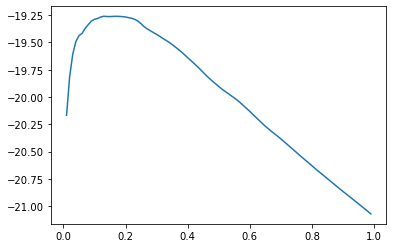

In [35]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [36]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-19.259383


In [37]:
### lasso regression 
lm_l = Lasso(alpha=0.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.259382520462992

In [38]:
### Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-14.939853441350905

In [39]:
### Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 
              'criterion':('mse','mae'), 
              'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

print(gs.best_score_)
print(gs.best_estimator_)

-14.883911022235894
RandomForestRegressor(criterion='mae', n_estimators=120)


In [40]:
# test ensembles 
pred_lm = lm.predict(X_test)
pred_lml = lm_l.predict(X_test)
pred_rf = gs.best_estimator_.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,pred_lm)


18.854675424213237

In [42]:
mean_absolute_error(y_test,pred_lml)


19.66533555747768

In [43]:
mean_absolute_error(y_test,pred_rf)

11.061017897091723

In [45]:
mean_absolute_error(y_test,(pred_lm+pred_rf)/2)

14.235069459601215

In [46]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ))

In [47]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [51]:
pred_rf

array([125.825     ,  54.52083333, 149.60416667, 124.1       ,
       149.03333333, 112.4125    , 145.89583333,  51.42916667,
        55.46666667,  64.41666667, 166.1625    ,  61.49583333,
       110.79583333, 116.45416667, 104.47083333, 138.13958333,
        63.7875    ,  68.87916667,  99.67083333, 100.125     ,
       113.72083333, 147.90416667, 149.17083333, 112.45416667,
       133.60833333, 104.12083333,  65.38333333, 146.94583333,
       102.16666667,  99.12083333, 100.0125    ,  53.37083333,
       124.49583333, 105.89166667, 102.75416667,  86.95833333,
        88.1125    , 112.89583333,  65.9125    , 117.325     ,
       201.70833333, 122.93333333,  92.18333333,  79.6125    ,
       159.85416667,  84.575     , 135.53541667, 118.67916667,
       131.3375    , 107.82083333, 116.5125    ,  82.7875    ,
        75.6875    ,  98.35833333,  92.16666667, 115.9125    ,
        92.18333333,  69.93333333, 241.9375    , 131.97916667,
       113.94166667,  93.20833333, 104.05      , 141.44

In [52]:
y_test

array([100.5,  48.5, 154.5, 122. , 162. , 107. , 150.5,  44.5,  59.5,
        51.5, 161.5,  61. , 102.5, 120. , 106.5, 140. ,  56.5,  61.5,
        85.5, 106. ,  74. , 154.5, 150.5, 110.5,  98.5, 109. ,  61. ,
       146.5, 107. ,  95. ,  87.5,  52.5, 133. ,  76.5, 110. ,  79.5,
        90. , 120. ,  62.5, 121. , 194.5, 122.5,  80. ,  74. , 169. ,
        69.5, 137. , 163.5, 128.5, 118. , 119.5,  68.5,  73. ,  99. ,
        82. , 109.5,  80. ,  66.5, 254. , 100. , 125. , 168. , 177. ,
       133.5, 107. , 107.5, 143.5, 139.5, 153. , 109.5, 169. , 139.5,
        76. , 100.5,  26.5, 107. ,  67. ,  74.5,  96. ,  81. , 138.5,
        94.5, 147. , 157. ,  86. , 134.5,  84. ,  20.5,  84.5,  52.5,
       116.5, 145. ,  81. ,  48.5, 139. , 106.5,  85. ,  54. ,  90.5,
        76.5,  95.5, 113. , 138.5, 111.5,  71.5, 124. , 167.5,  90. ,
        60. , 232.5,  66.5, 109. ,  87. , 113.5,  51. ,  87. ,  54. ,
        76. ,  96. ,  81. ,  51.5,  84.5,  82. ,  93. ,  70. , 225. ,
        75.5,  84. ,